In [1]:
import tensorflow as tf
import sys, imageio, os
import keras
sys.path.append("/Users/kai/Downloads/graduation/final_git/MasterThesis/src/")
from config import *
from model import *
from data_prepare import *

## Loading latest dataset

In [2]:
X, y = data("20221116_Plate21")
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)
X_train,y_train = data("varying_lum_and_focus_train")
X_test,y_test = data("varying_lum_and_focus_test")

In [4]:
# https://analyticsindiamag.com/hands-on-guide-to-bootstrap-sampling-for-ml-performance-evaluation/
X = np.concatenate([X_test,X_test_new], axis=0)
y_test_new = y_test_new*2
y = np.concatenate([y_test,y_test_new], axis=0)
X.shape, y.shape

((687, 120), (687, 1))

## Loading current model. Trying to evaluate the best one by bootstrapping.
https://carpentries-incubator.github.io/machine-learning-novice-python/07-bootstrapping/index.html#:~:text=In%20statistics%20and%20machine%20learning,our%20resampled%20dataset%20multiple%20times.

In [24]:
HB_only_new = keras.models.load_model(model_path+"CNN_only_new_HB_best_model")
BO_only_new = keras.models.load_model(model_path+"CNN_only_new_BO_best_model")
HB_vary_lum_focus = keras.models.load_model(model_path+"HB_CNN_MAE_0.87_vary_lum_focus")
BO_vary_lum_focus  = keras.models.load_model(model_path+"BO_CNN_MAE_0.84_vary_lum_focus")
BO_combine = keras.models.load_model(model_path+"CNN_combine_best_BO")
HB_combine_old = keras.models.load_model(model_path+"CNN_combine_best_HB_1204")
HB_combine_new = keras.models.load_model(model_path+"NN_combine_best_HB_1205")
BO_combine_crop_80 = keras.models.load_model(model_path+"CNN_combine_BO_crop_80_best_model")
HB_combine_crop_80 = keras.models.load_model(model_path+"CNN_combine_HB_crop_80_best_model")
BO_new = keras.models.load_model(model_path+"bin2_BO_crop_to_100_best_model/")
HB_new = keras.models.load_model(model_path+"bin2_HB_crop_to_100_best_model/")
BO_combine_without_centeral_crop = keras.models.load_model(model_path+"CNN_combine_without_centeral_crop_BO_best_model")
HB_combine_without_centeral_crop = keras.models.load_model(model_path+"CNN_combine_without_centeral_crop_HB_best_model")
BO_new_without = keras.models.load_model(model_path+"bin2_BO_without_crop_best_model/")
HB_new_without = keras.models.load_model(model_path+"bin2_HB_without_crop_best_model/")
felix = keras.models.load_model(AMFTracker_path + "/amftrack/ml/models/default_model")


In [148]:
HB_model = [HB_only_new,HB_new,HB_vary_lum_focus,HB_combine_old,HB_combine_new,HB_combine_crop_80,HB_combine_without_centeral_crop,HB_new_without]
BO_model = [BO_only_new,BO_new,BO_vary_lum_focus,BO_combine,BO_combine_crop_80,BO_combine_without_centeral_crop,BO_new_without]
HB_label = ["HB_only_new","HB_new","HB_vary_lum_focus","HB_combine_old","HB_combine_new","HB_combine_crop_80","HB_combine_without_centeral_crop","HB_new_without"]
BO_label = ["BO_only_new","BO_new","BO_vary_lum_focus","BO_combine","BO_combine_crop_80","BO_combine_without_centeral_crop","BO_new_without"]

In [151]:
HB_accuracy = []
HB_loss = []
for i in range(len(HB_model)):
    HB_accuracy.append([])
    HB_loss.append([])
BO_accuracy = []
BO_loss = []
for i in range(len(BO_model)):
    BO_accuracy.append([])
    BO_loss.append([])

In [153]:
from sklearn.utils import resample
import matplotlib.pyplot as plt
IMAGESIZE = 120
OUTPUTSIZE = 100
def data_preparation(X_test):
    data_preprocessing = keras.Sequential([
        tf.keras.Input(shape=(IMAGESIZE, 1)),
        center_crop_layer(IMAGESIZE, OUTPUTSIZE)])
    return data_preprocessing(X_test)
n_iterations = 1000
for i in range(5):
    for _ in range(n_iterations):
        X_bs, y_bs = resample(X, y, replace=True,n_samples=50)
        loss, acc = HB_model[i].evaluate(data_preparation(X_bs),y_bs,verbose=1)
        HB_accuracy[i].append(acc)
        HB_loss[i].append(loss)
i = 6
for _ in range(n_iterations):
    X_bs, y_bs = resample(X, y, replace=True,n_samples=50)
    loss, acc = HB_model[i].evaluate(X_bs,y_bs,verbose=1)
    HB_accuracy[i].append(acc)
    HB_loss[i].append(loss)
i = 7
for _ in range(n_iterations):
    X_bs, y_bs = resample(X, y, replace=True,n_samples=50)
    loss, acc = HB_model[i].evaluate(X_bs,y_bs,verbose=1)
    HB_accuracy[i].append(acc)
    HB_loss[i].append(loss)

2/2 [==============================] - 0s 12ms/step - loss: 4.2721 - mean_absolute_error: 1.0415


In [154]:
for i in range(4):
    for _ in range(n_iterations):
        X_bs, y_bs = resample(X, y, replace=True,n_samples=50)
        loss, acc = BO_model[i].evaluate(data_preparation(X_bs),y_bs,verbose=1)
        BO_accuracy[i].append(acc)
        BO_loss[i].append(loss)
i = 5
for _ in range(n_iterations):
    X_bs, y_bs = resample(X, y, replace=True,n_samples=50)
    loss, acc = BO_model[i].evaluate(X_bs,y_bs,verbose=1)
    BO_accuracy[i].append(acc)
    BO_loss[i].append(loss)
i = 6
for _ in range(n_iterations):
    X_bs, y_bs = resample(X, y, replace=True,n_samples=50)
    loss, acc = BO_model[i].evaluate(X_bs,y_bs,verbose=1)
    BO_accuracy[i].append(acc)
    BO_loss[i].append(loss)

2/2 [==============================] - 0s 9ms/step - loss: 6.6430 - mean_absolute_error: 0.8093


In [155]:
accuracy = []
loss_list = []
for _ in range(n_iterations):
    X_bs, y_bs = resample(X, y, replace=True,n_samples=50)
    loss, acc = felix.evaluate(data_preparation(X_bs),y_bs,verbose=1)
    accuracy.append(acc)
    loss_list.append(loss)

2/2 [==============================] - 0s 2ms/step - loss: 5.8354 - mean_absolute_error: 1.3549


In [156]:
"""
for different dataset output size
"""
IMAGESIZE = 120
OUTPUTSIZE= 80
def center_crop(x, margin):
    return x[..., margin:-margin, :]

def center_crop_layer(IMAGESIZE,OUTPUTSIZE):
    return keras.layers.Lambda(lambda x: center_crop(x,(IMAGESIZE-OUTPUTSIZE)//2),name="center_crop")

def data_preparation(X_test):
    data_preprocessing = keras.Sequential([
        tf.keras.Input(shape=(IMAGESIZE, 1)),
        center_crop_layer(IMAGESIZE, OUTPUTSIZE)])
    return data_preprocessing(X_test)

i = 5
for _ in range(n_iterations):
    X_bs, y_bs = resample(X, y, replace=True,n_samples=50)
    loss, acc = HB_model[i].evaluate(data_preparation(X_bs),y_bs,verbose=1)
    HB_accuracy[i].append(acc)
    HB_loss[i].append(loss)
    
i = 4
for _ in range(n_iterations):
    X_bs, y_bs = resample(X, y, replace=True,n_samples=50)
    loss, acc = BO_model[i].evaluate(data_preparation(X_bs),y_bs,verbose=1)
    BO_accuracy[i].append(acc)
    BO_loss[i].append(loss)

2/2 [==============================] - 0s 5ms/step - loss: 12.4070 - mean_absolute_error: 2.4248


Text(0.5, 0, 'MAE')

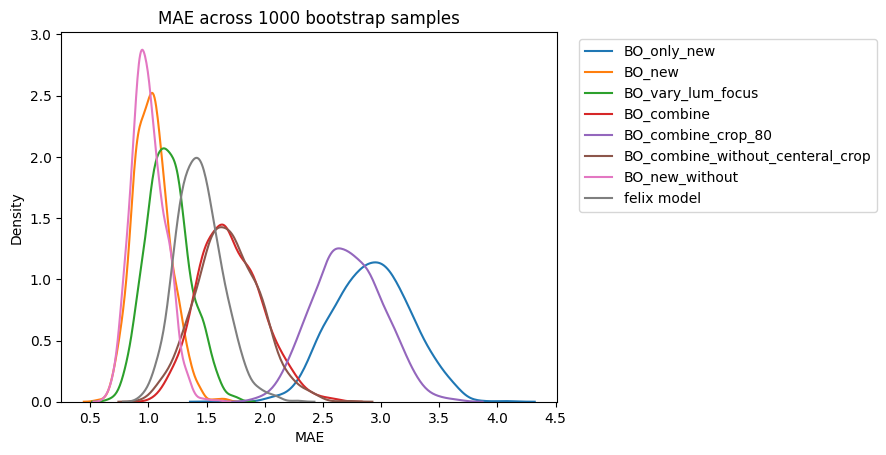

In [157]:
import seaborn as sns
# plot distribution of accuracy
for i in range(len(BO_accuracy)):
    sns.kdeplot(BO_accuracy[i],label=BO_label[i])
for i in range(len(HB_accuracy)):
    sns.kdeplot(HB_accuracy[i],label=HB_label[i])
sns.kdeplot(accuracy,label="felix model")
# plt.xlim(0,5)
plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
plt.title("MAE across 1000 bootstrap samples")
plt.xlabel("MAE")
# plt.savefig("plot_data/BootstrapingModel.png",bbox_inches="tight")

In [55]:
BO_new = keras.models.load_model(model_path+"bin2_BO_crop_to_100_best_model/")
HB_new = keras.models.load_model(model_path+"bin2_HB_crop_to_100_best_model/")
BO_new_without = keras.models.load_model(model_path+"bin2_BO_without_crop_best_model/")
HB_new_without = keras.models.load_model(model_path+"bin2_HB_without_crop_best_model/")
felix = keras.models.load_model(AMFTracker_path+"/amftrack/ml/models/default_model")

In [145]:
HB_model = [HB_new, HB_new_without]
BO_model = [BO_new,BO_new_without]
HB_label = ["HB_new_crop_100","HB_new_without_crop"]
BO_label = ["BO_new_crop_100","BO_new_without_crop"]

In [60]:
HB_accuracy = []
HB_loss = []
for i in range(len(HB_model)):
    HB_accuracy.append([])
    HB_loss.append([])
BO_accuracy = []
BO_loss = []
for i in range(len(BO_model)):
    BO_accuracy.append([])
    BO_loss.append([])

In [ ]:
from sklearn.utils import resample
import matplotlib.pyplot as plt
IMAGESIZE = 120
OUTPUTSIZE = 100
def data_preparation(X_test):
    data_preprocessing = keras.Sequential([
        tf.keras.Input(shape=(IMAGESIZE, 1)),
        center_crop_layer(IMAGESIZE, OUTPUTSIZE)])
    return data_preprocessing(X_test)
n_iterations = 1000
for i in range(1):
    for _ in range(n_iterations):
        X_bs, y_bs = resample(X, y, replace=True,n_samples=50)
        loss, acc = HB_model[i].evaluate(data_preparation(X_bs),y_bs,verbose=1)
        HB_accuracy[i].append(acc)
        HB_loss[i].append(loss)
i = 1
for _ in range(n_iterations):
    X_bs, y_bs = resample(X, y, replace=True,n_samples=50)
    loss, acc = HB_model[i].evaluate(X_bs,y_bs,verbose=1)
    HB_accuracy[i].append(acc)
    HB_loss[i].append(loss)

for i in range(1):
    for _ in range(n_iterations):
        X_bs, y_bs = resample(X, y, replace=True,n_samples=50)
        loss, acc = BO_model[i].evaluate(data_preparation(X_bs),y_bs,verbose=1)
        BO_accuracy[i].append(acc)
        BO_loss[i].append(loss)
i = 1
for _ in range(n_iterations):
    X_bs, y_bs = resample(X, y, replace=True,n_samples=50)
    loss, acc = BO_model[i].evaluate(X_bs,y_bs,verbose=1)
    BO_accuracy[i].append(acc)
    BO_loss[i].append(loss)
accuracy = []
loss_list = []
for _ in range(n_iterations):
    X_bs, y_bs = resample(X, y, replace=True,n_samples=50)
    loss, acc = felix.evaluate(data_preparation(X_bs),y_bs,verbose=1)
    accuracy.append(acc)
    loss_list.append(loss)

2/2 [==============================] - 0s 2ms/step - loss: 5.5785 - mean_absolute_error: 1.3591


Text(0.5, 0, 'MAE')

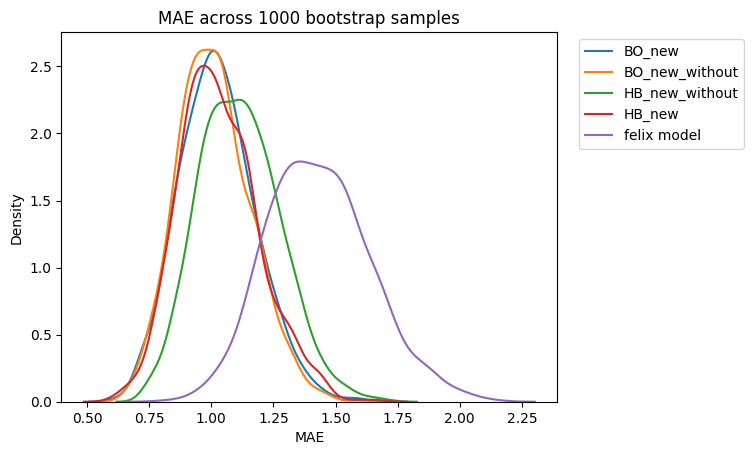

In [73]:
import seaborn as sns
# plot distribution of accuracy
for i in range(len(BO_accuracy)):
    sns.kdeplot(BO_accuracy[i],label=BO_label[i])
# for i in range(len(HB_accuracy)):
#     sns.kdeplot(HB_accuracy[i],label=HB_label[i])

i=1
sns.kdeplot(HB_accuracy[i],label=HB_label[i])
i=0
sns.kdeplot(remove,label=HB_label[i])
sns.kdeplot(accuracy,label="felix model")
plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
plt.title("MAE across 1000 bootstrap samples")
plt.xlabel("MAE")
# plt.savefig("plot_data/BootstrapingModel.png",bbox_inches="tight")

In [141]:
HB_accuracy_RE = []
for i in range(len(HB_model)):
    HB_accuracy_RE.append([])
BO_accuracy_RE = []
for i in range(len(BO_model)):
    BO_accuracy_RE.append([])
accuracy_RE = []

In [142]:
from sklearn.utils import resample
import matplotlib.pyplot as plt
n_iterations = 1000
for i in range(1):
    for _ in range(n_iterations):
        X_bs, y_bs = resample(X, y, replace=True,n_samples=50)
        RE = np.mean(abs(HB_model[i].predict(data_preparation(X_bs))-y_bs)/y_bs)
        HB_accuracy_RE[i].append(RE)
        RE = np.mean(abs(BO_model[i].predict(data_preparation(X_bs))-y_bs)/y_bs)
        BO_accuracy_RE[i].append(RE)
        RE = np.mean(abs(felix.predict(data_preparation(X_bs))-y_bs)/y_bs)
        accuracy_RE.append(RE)
        
i = 1
for _ in range(n_iterations):
    X_bs, y_bs = resample(X, y, replace=True,n_samples=50)
    RE = np.mean(abs(HB_model[i].predict(X_bs)-y_bs)/y_bs)
    HB_accuracy_RE[i].append(RE)
    RE = np.mean(abs(BO_model[i].predict(X_bs)-y_bs)/y_bs)
    BO_accuracy_RE[i].append(RE)

2/2 [==============================] - 0s 15ms/step


IndexError: list index out of range

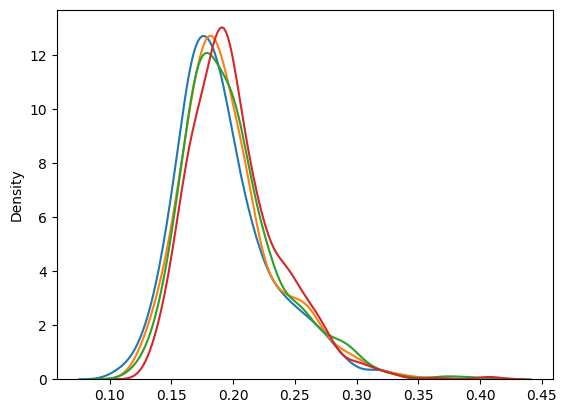

In [158]:
# plot distribution of accuracy
for i in range(len(BO_model)):
    sns.kdeplot(BO_accuracy_RE[i],label=BO_label[i])
    sns.kdeplot(HB_accuracy_RE[i],label=HB_label[i])
sns.kdeplot(accuracy_RE,label="felix model")
plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
plt.title("Relative Error across 1000 bootstrap samples")
plt.xlabel("Relative Error")
plt.savefig("plot_data/BootstrapingModel_RE.png",bbox_inches="tight")